In [1]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [2]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape :', x_test.shape)
print('y_test shpae :', y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape : (10000, 28, 28)
y_test shpae : (10000,)


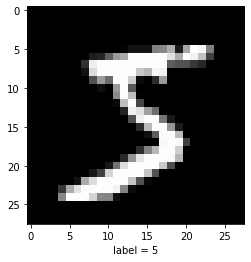

In [3]:
# plot some data
from matplotlib import pyplot as plt

image = x_train[0] 
label = y_train[0]
plt.imshow(image, cmap='gray')
plt.xlabel('label = {}'.format(label))
plt.show()

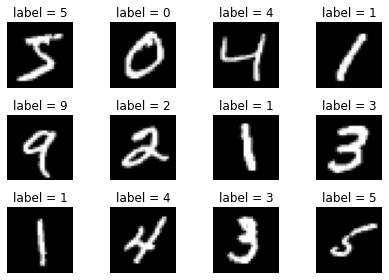

In [4]:
ROW = 3
COLUMN = 4
for i in range(ROW * COLUMN):
    image = x_train[i]
    label = y_train[i]
    plt.subplot(ROW, COLUMN, i+1)
    plt.imshow(image, cmap='gray')
    plt.title('label = {}'.format(label))
    plt.axis('off')  # do not show axis value
plt.tight_layout()   # automatic padding between subplots
# plt.savefig('images/mnist_plot.png')
plt.show()

In [5]:
# do some preprocessing on data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [6]:
print('after preprocess new shape of data:')
print('-' * 35)
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape :', x_test.shape)
print('y_test shpae :', y_test.shape)

after preprocess new shape of data:
-----------------------------------
x_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
x_test shape : (10000, 28, 28, 1)
y_test shpae : (10000,)


In [7]:
import os 
os.environ['TF_CPP_LOG_LEVEL'] = "1" # ignore tensorflwo worning

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(10, activation='softmax'))

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential([
    Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]),
    Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(rate=0.25),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(rate=0.25),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(rate=0.5),
    Dense(10, activation='softmax')
])

In [9]:
from keras.models import Model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, Input

inputs = Input(shape=x_train.shape[1:])

x = Conv2D(filters=32, kernel_size=(5,5), activation='relu')(inputs)
x = Conv2D(filters=32, kernel_size=(5,5), activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.25)(x)

x = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(x)
x = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.25)(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(rate=0.5)(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=predictions)

In [10]:
model.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 20, 20, 32)        25632     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 6, 6, 64)          36928 

In [12]:
epochs = 5
history = model.fit(x=x_train, y=y_train, epochs=5)

Epoch 1/5
1152/1875 [=================>............] - ETA: 1:13 - loss: 0.5441 - accuracy: 0.8198

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
plt.plot(history.history['acc'], label='training accuracy')
# plt.plot(history.history['val_acc'], label='testing accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

In [ ]:
plt.plot(history.history['loss'], label='training loss')
# plt.plot(history.history['val_loss'], label='testing loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [ ]:
import os

model_name = 'mnist_clf.h5'
model.save(model_name)
print('model saved to', os.getcwd())
!ls -ltr

In [ ]:
from keras.models import load_model

loaded_model = load_model(model_name)
model.summary()

In [ ]:
image_index = 0 # 4444
test_image = x_test[image_index].reshape(28, 28)
plt.imshow(test_image, cmap='gray')

In [ ]:
test_image = test_image.reshape(1, 28, 28, 1) # make image batch

pred = loaded_model.predict(test_image)       # prediction

print('pred lenght:', len(pred[0]))
best_prediction = pred.argmax()
print('best_prediction', best_prediction)

In [ ]:
import numpy as np

def show_failures(predictions, trueclass=None, predictedclass=None, maxtoshow=5):
    rounded = np.argmax(predictions, axis=1)
    errors = rounded!=y_test
    print('Showing max', maxtoshow, 'first failures. '
          'The predicted class is shown first and the correct class in parenthesis.')
    ii = 0
    plt.figure(figsize=(maxtoshow, 1))
    for i in range(x_test.shape[0]):
        if ii>=maxtoshow:
            break
        if errors[i]:
            if trueclass is not None and y_test[i] != trueclass:
                continue
            if predictedclass is not None and predictions[i] != predictedclass:
                continue
            plt.subplot(1, maxtoshow, ii+1)
            plt.axis('off')
            plt.imshow(x_test[i,:,:,0], cmap="gray")
            plt.title("%d (%d)" % (rounded[i], y_test[i]))
            ii = ii + 1

In [ ]:
predictions = loaded_model.predict(x_test)

show_failures(predictions)